In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle


In [4]:
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31', auto_adjust=False)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.288584,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.604334,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.606552,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.937569,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.857309,27.972500,28.037500,27.174999,27.307501,237458000


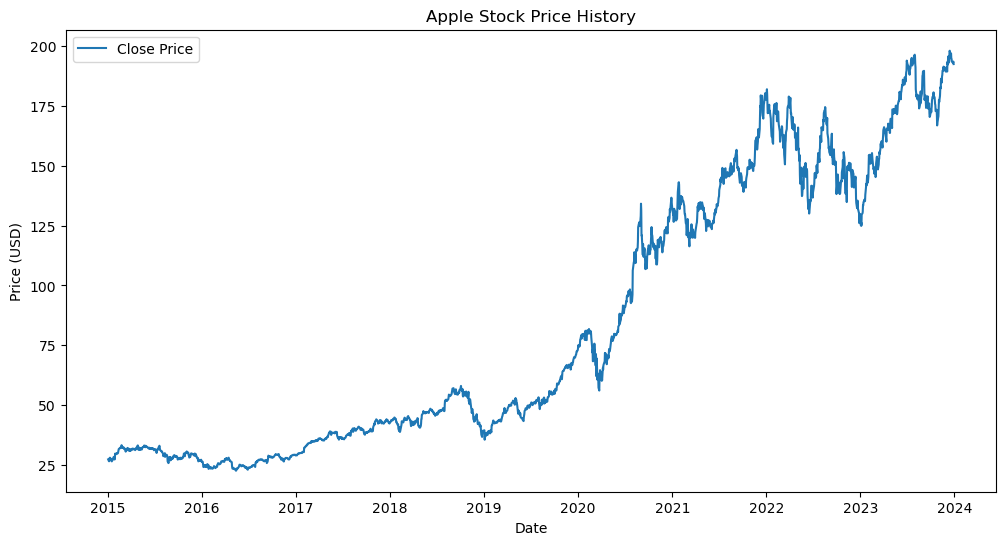

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title("Apple Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [6]:
df = df[['Close']]
future_days = 30
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(10) 

Price,Close,Prediction
Ticker,AAPL,
Date,,
2023-12-15,197.570007,NaN
2023-12-18,195.889999,NaN
2023-12-19,196.940002,NaN
2023-12-20,194.830002,NaN
2023-12-21,194.679993,NaN
2023-12-22,193.600006,NaN
2023-12-26,193.050003,NaN
2023-12-27,193.149994,NaN


In [7]:
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:

predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 82.95607022149869


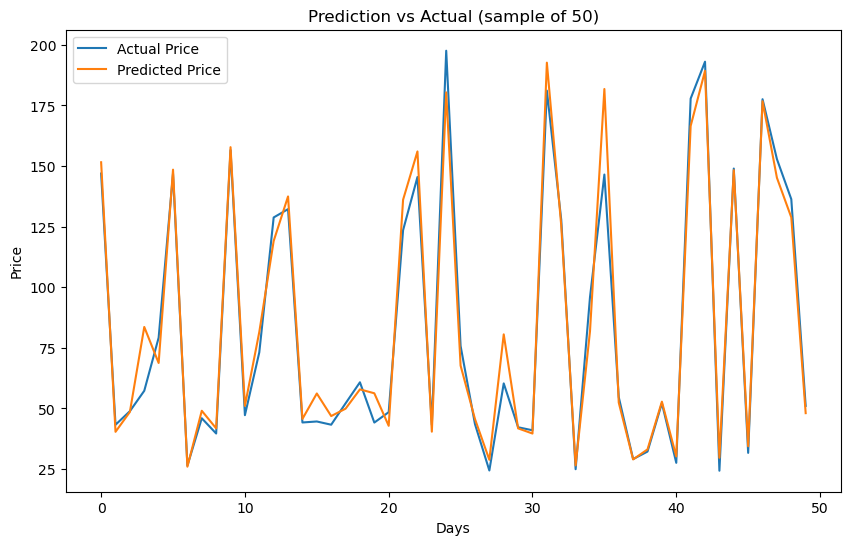

In [10]:
plt.figure(figsize=(10,6))
plt.plot(y_test[:50], label='Actual Price')
plt.plot(predictions[:50], label='Predicted Price')
plt.title("Prediction vs Actual (sample of 50)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


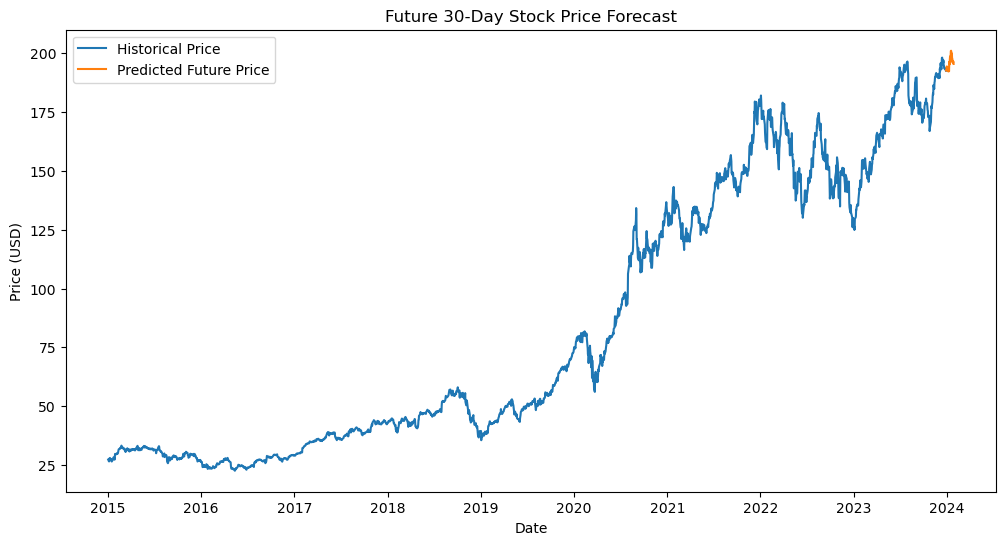

In [11]:

x_future = df.drop(['Prediction'], axis=1)[-future_days:]
x_future = np.array(x_future)

future_predictions = lr.predict(x_future)
predicted_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days)
forecast_df = pd.DataFrame(future_predictions, index=predicted_dates, columns=['Predicted Price'])
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Historical Price')
plt.plot(forecast_df, label='Predicted Future Price')
plt.title("Future 30-Day Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [14]:
with open("stock_model.pkl", "wb") as f:
    pickle.dump(lr, f)


In [22]:
import os

print("Model file exists:" if os.path.exists("stock_model.pkl") else "Model file not found.")


Model file exists:


In [26]:
import os

os.chdir("C:\\Users\\yamun\\OneDrive\\Desktop\\Yamuna_py")
print("Current path:", os.getcwd())


Current path: C:\Users\yamun\OneDrive\Desktop\Yamuna_py


In [2]:
import pkg_resources

# Get all installed packages and their versions
installed_packages = pkg_resources.working_set
packages_list = sorted(["{}=={}".format(i.key, i.version) for i in installed_packages])
with open("requirements.txt", "w") as f:
    for pkg in packages_list:
        f.write(pkg + "\n")

# Display the file contents
with open("requirements.txt", "r") as f:
    print(f.read())


C:\Users\yamun\AppData\Local\Temp\ipykernel_7264\2181118174.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


aiobotocore==2.19.0
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aioitertools==0.7.1
aiosignal==1.2.0
alabaster==0.7.16
altair==5.5.0
anaconda-anon-usage==0.7.1
anaconda-auth==0.8.6
anaconda-catalogs==0.2.0
anaconda-cli-base==0.5.2
anaconda-client==1.13.0
anaconda-navigator==2.6.6
anaconda-project==0.11.1
annotated-types==0.6.0
anyio==4.7.0
appdirs==1.4.4
archspec==0.2.3
argon2-cffi-bindings==21.2.0
argon2-cffi==21.3.0
arrow==1.3.0
astroid==3.3.8
astropy-iers-data==0.2025.1.13.0.34.51
astropy==7.0.0
asttokens==3.0.0
async-lru==2.0.4
asyncssh==2.17.0
atomicwrites==1.4.0
attrs==24.3.0
autocommand==2.2.2
automat==24.8.1
autopep8==2.0.4
babel==2.16.0
backports.tarfile==1.2.0
bcrypt==4.3.0
beautifulsoup4==4.12.3
binaryornot==0.4.4
black==24.10.0
bleach==6.2.0
blinker==1.9.0
bokeh==3.6.2
boltons==24.1.0
botocore==1.36.3
bottleneck==1.4.2
brotli==1.0.9
cachetools==5.5.1
certifi==2025.4.26
cffi==1.17.1
chardet==4.0.0
charset-normalizer==3.3.2
click==8.1.8
cloudpickle==3.0.0
colorama==0.4.6
colorce

In [15]:
readme_text = """
# 📈 Stock Price Prediction using Machine Learning

This project predicts future stock prices using historical data and machine learning models.

## 📌 Features
- Stock data from Yahoo Finance
- Linear Regression model
- Data visualization
- Future price forecasting

## 🛠️ Installation
To install all dependencies, run:

    pip install -r requirements.txt

## 🚀 Usage
Run the Jupyter Notebook and execute all cells in order to:
1. Fetch stock data
2. Train the model
3. Predict future prices

## 📁 Files
- `stock_prediction.ipynb` – Main notebook
- `requirements.txt` – Dependencies
- `stock_model.pkl` – Trained model
"""

with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_text)

print(" New README.md created successfully!")


 New README.md created successfully!


In [16]:
with open("README.md", "r", encoding="utf-8") as f:
    print(f.read())



# 📈 Stock Price Prediction using Machine Learning

This project predicts future stock prices using historical data and machine learning models.

## 📌 Features
- Stock data from Yahoo Finance
- Linear Regression model
- Data visualization
- Future price forecasting

## 🛠️ Installation
To install all dependencies, run:

    pip install -r requirements.txt

## 🚀 Usage
Run the Jupyter Notebook and execute all cells in order to:
1. Fetch stock data
2. Train the model
3. Predict future prices

## 📁 Files
- `stock_prediction.ipynb` – Main notebook
- `requirements.txt` – Dependencies
- `stock_model.pkl` – Trained model



In [11]:
import os

print(" Current folder:")
print(os.getcwd())


 Current folder:
C:\Users\yamun\OneDrive\Desktop\Yamuna_py


In [6]:
os.chdir("C:\\Users\\yamun\\OneDrive\\Desktop\\Yamuna_py")
print("Changed directory to:", os.getcwd())


Changed directory to: C:\Users\yamun\OneDrive\Desktop\Yamuna_py


In [7]:
print("📄 File List:")
for file in os.listdir():
    print("-", file)


📄 File List:
- .ipynb_checkpoints
- cu.item
- df_excel
- df_excel.pkl
- mercedesbenz.csv
- ML-checkpoint
- ML.ipynb
- new_Test1.csv
- Python
- requirements.txt
- Test.csv
- Test1.csv
- wine.csv


In [8]:
readme_text = """
# 📈 Stock Price Prediction using Machine Learning

This project predicts future stock prices using historical data and machine learning models.

## 📌 Features
- Stock data from Yahoo Finance
- Linear Regression model
- Data visualization
- Future price forecasting

## 🛠️ Installation
To install all dependencies, run:

    pip install -r requirements.txt

## 🚀 Usage
Run the Jupyter Notebook and execute all cells in order to:
1. Fetch stock data
2. Train the model
3. Predict future prices

## 📁 Files
- `stock_prediction.ipynb` – Main notebook
- `requirements.txt` – Dependencies
- `stock_model.pkl` – Trained model (optional)
"""

with open("README.md", "w", encoding="utf-8") as f:
    f.write(readme_text)

print("README.md created successfully!")


README.md created successfully!


In [10]:
for file in ["ML.ipynb", "requirements.txt", "README.md"]:
    print(f"{file}:Found" if os.path.exists(file) else f"{file}: Missing")


ML.ipynb:Found
requirements.txt:Found
README.md:Found
